# 3.4.1 데이터 불러오기

In [11]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('healthcare-dataset-stroke-data.csv') # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [2]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 3.4.2 ID 변수 설정

In [2]:
df['id'].dtypes

dtype('int64')

In [3]:
df['id'].isnull().sum()   # ID 변수인 id 값의 결측값 확인

0

In [2]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크 

n = len(pd.unique(df['id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트  
print(n)

5110


In [5]:
# 참고: 숫자형태가 아닌 SERIALNO의 갯수를 세는 파이썬 코드

mask = pd.to_numeric(df['id'], errors='coerce').isna()
a = mask.sum() 
print (a)  

0


# 3.4.3 타겟변수 생성

In [7]:
df['stroke'].dtype

dtype('int64')

In [8]:
df['stroke'].isnull().sum()

0

In [2]:
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [3]:
df['stroke'].value_counts(dropna=False, normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

# 3.4.4 기타 변수 데이터 처리

In [3]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [4]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.25,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [7]:
df['age'] > 18   # c는 기준(criterion)의 약자

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
31       True
32       True
33       True
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

In [5]:
c = df['age'] > 18   # c는 기준(criterion)의 약자
df[c].head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [6]:
len(df[c])   # df[c]의 자료 개수(행 기준)

4194

In [7]:
len(df[c]) / len(df)   # df에 대비해서 df[c]의 자료 개수(행 기준) 비율

0.8207436399217222

In [8]:
df1 = df[c]   # 데이터프레임 df[c]를 df1에 저장
df1.shape

(4194, 12)

In [9]:
# Residence_type 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns={'Residence_type' : 'residence_type'}) 

In [10]:
# 범주형 변수를 cols1에 저장.
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'residence_type', 'smoking_status']
df1[cols1].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [14]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

# 3.5.1 결측값 50% 초과 변수 제거

In [35]:
df1.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

bmi    True
dtype: bool

In [37]:
# bmi의 결측값 비율 확인

df['bmi'].isnull().mean()

0.03933463796477495

# 3.5.2 요약통계 및 도수분포표 점검

In [11]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장 
df1[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [12]:
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [13]:
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [14]:
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [15]:
pd.crosstab(df1['work_type'], columns='count')   # frequency table 생성(개수 기준)

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [16]:
pd.crosstab(df1['work_type'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준).

col_0,ratio
work_type,
Govt_job,0.15
Never_worked,0.00
Private,0.65
Self-employed,0.19


In [17]:
pd.crosstab(df1['work_type'], df1['stroke'])   # frequency table 생성(개수 기준)

stroke,0,1
work_type,,
Govt_job,615,33
Never_worked,2,0
Private,2591,149
Self-employed,739,65


In [18]:
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)   # frequency table 생성(비율 기준)

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


# 3.5.3 이상값 제거

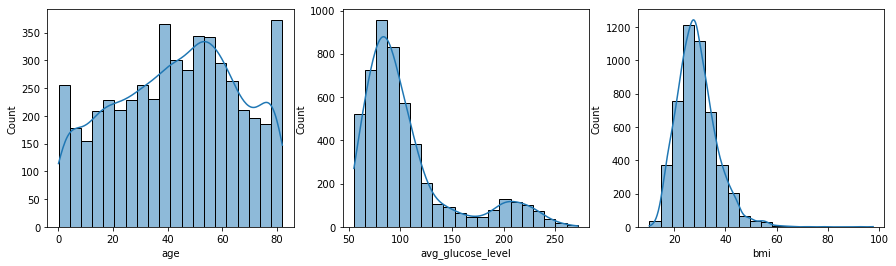

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20)
plt.show(); 

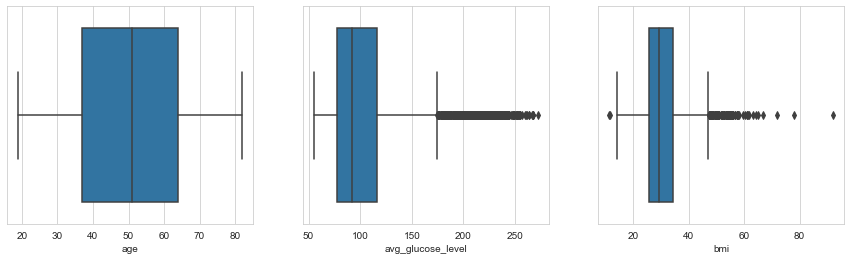

In [20]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'age', data = df1) 
sns.boxplot(ax=axes[1], x = 'avg_glucose_level', data = df1) 
sns.boxplot(ax=axes[2], x = 'bmi', data = df1); 

In [21]:
Q1 = df1[['age','avg_glucose_level','bmi']].quantile(0.25)
Q3 = df1[['age','avg_glucose_level','bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [22]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64


In [23]:
print(Upper)

age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [24]:
c1 = df1['avg_glucose_level'] <= 232.64
c2 = df1['bmi'] <= 60.3

df2 = df1[c1 & c2]
df2.shape

(3915, 12)

In [25]:
(4194-3915)/4194

0.06652360515021459

In [26]:
4194-3915

279

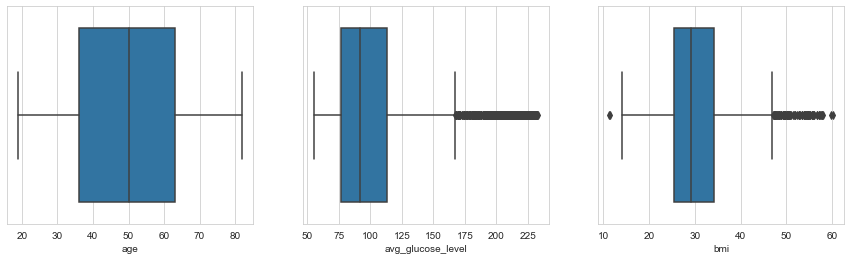

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'age', data = df2) 
sns.boxplot(ax=axes[1], x = 'avg_glucose_level', data = df2) 
sns.boxplot(ax=axes[2], x = 'bmi', data = df2); 

# 3.5.4 상관관계 검토

In [28]:
cols = ['age','avg_glucose_level','bmi'] # 구간 변수를 cols에 저장
round(df2[cols].corr(), 2)               # 구간 변수간 상관계수 디스플레이

,age,avg_glucose_level,bmi
age,1.00,0.20,0.02
avg_glucose_level,0.20,1.00,0.16
bmi,0.02,0.16,1.00


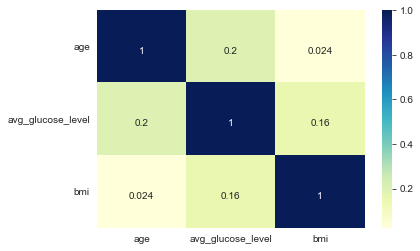

In [29]:
import seaborn as sns

corr = df2[cols].corr()  
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

In [30]:
df2.to_csv('healthcare-dataset-2.csv', index=False) 